In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns

## Full Option Setting
pd.set_option('display.max_columns', None)

### STEP.1 Import Data

In [162]:
iowa = pd.read_csv(r'./Dataset/train.csv')
iowa.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [163]:
iowa_post_drop = iowa.shape[0]
iowa.shape

(2197, 82)

In [164]:
iowa.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

### STEP.2 CLEANING DATA

In [165]:
null_df = pd.DataFrame({'Null':iowa.isnull().sum().sort_values(ascending=False)
                        ,'Null_Percentage':iowa.isnull().mean().sort_values(ascending=False)*100})
null_df[null_df['Null'] > 0].transpose()

,Pool QC,Misc Feature,Alley,Fence,Fireplace Qu,Lot Frontage,Garage Yr Blt,Garage Qual,Garage Cond,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,Mas Vnr Area,Mas Vnr Type,BsmtFin SF 2,Bsmt Full Bath,Bsmt Unf SF,Total Bsmt SF,Electrical,BsmtFin SF 1,Bsmt Half Bath,Garage Cars,Garage Area
Null,2185.000000,2117.000000,2054.000000,1778.000000,1066.00000,362.000000,122.000000,122.000000,122.000000,122.000000,120.000000,69.000000,68.00000,67.000000,67.000000,67.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Null_Percentage,99.453801,96.358671,93.491124,80.928539,48.52071,16.477014,5.553027,5.553027,5.553027,5.553027,5.461994,3.140646,3.09513,3.049613,3.049613,3.049613,1.001365,1.001365,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517


## Missing Value Filtering Out

fill out these columns with 'NA' words

1. Alley (Nominal): Type of alley access to property : **NA = No alley access**
2. FireplaceQu (Ordinal): Fireplace quality : **NA	= No Fireplace**
3. Pool QC (Ordinal): Pool quality : **NA = No Pool**
4. Fence (Ordinal): Fence quality : **NA = No Fence**
5. Misc Feature (Nominal): Miscellaneous feature not covered in other categories : **NA : None**
6. Garage Type (Nominal): Garage location   :  **NA	= No Garage**
7. Garage Finish (Ordinal)	: Interior finish of the garage   :  **NA =	No Garage**
8. Garage Cond (Ordinal): Garage condition: **NA =	No Garage**
9. Garage Qual (Ordinal): Garage quality: **NA =	No Garage**

10. BsmtFin Type 1	(Ordinal): Rating of basement finished area : **NA = No Basement**
11. BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types) : **NA = No Basement**
12. Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls : **NA = No Basement**
13. Bsmt Cond (Ordinal): Evaluates the general condition of the basement : **NA = No Basement**
14. Bsmt Qual (Ordinal): Evaluates the height of the basement : **NA = No Basement**
15. Mas Vnr Type (Nominal): Masonry veneer type : **None = None**

In [166]:
iowa[['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature','Garage Type'
            ,'Garage Finish','Garage Cond','Garage Qual',
            'BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure','Bsmt Cond','Bsmt Qual']]

,Alley,Fireplace Qu,Pool QC,Fence,Misc Feature,Garage Type,Garage Finish,Garage Cond,Garage Qual,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure,Bsmt Cond,Bsmt Qual
0,NaN,NaN,NaN,NaN,NaN,Detchd,RFn,TA,TA,Unf,Unf,No,TA,Gd
1,NaN,TA,NaN,NaN,NaN,Attchd,RFn,TA,TA,ALQ,BLQ,Mn,TA,Gd
2,NaN,Gd,NaN,NaN,NaN,Basment,RFn,TA,TA,GLQ,Rec,No,TA,TA
3,NaN,Gd,NaN,NaN,NaN,Attchd,RFn,TA,TA,Unf,Unf,No,TA,Ex
4,NaN,NaN,NaN,NaN,NaN,BuiltIn,Fin,TA,TA,GLQ,Rec,Mn,TA,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,NaN,TA,NaN,NaN,NaN,Attchd,Fin,TA,TA,GLQ,Unf,Mn,TA,Gd
2193,Pave,Gd,NaN,NaN,NaN,Basment,Unf,TA,TA,LwQ,Unf,No,Fa,TA
2194,NaN,TA,NaN,NaN,NaN,BuiltIn,Fin,TA,TA,GLQ,Unf,No,TA,Gd
2195,NaN,NaN,NaN,NaN,Shed,Basment,Unf,TA,Fa,ALQ,Unf,No,TA,TA


In [167]:
# fill out these columns with 'NA' words
col_list = ['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature','Garage Type'
            ,'Garage Finish','Garage Cond','Garage Qual','BsmtFin Type 1','BsmtFin Type 2'
            ,'Bsmt Exposure','Bsmt Cond','Bsmt Qual']
for i in col_list:
    iowa[i] = iowa[i].fillna('NA')

In [168]:
## Post Na Filling Out.
null_df = pd.DataFrame({'Null':iowa.isnull().sum().sort_values(ascending=False)
                        ,'Null_Percentage':iowa.isnull().mean().sort_values(ascending=False)*100})
null_df[null_df['Null'] > 0].transpose()

,Lot Frontage,Garage Yr Blt,Mas Vnr Type,Mas Vnr Area,Electrical,Bsmt Full Bath,Bsmt Half Bath,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,Garage Cars,BsmtFin SF 1,Garage Area
Null,362.000000,122.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Null_Percentage,16.477014,5.553027,1.001365,1.001365,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517,0.045517


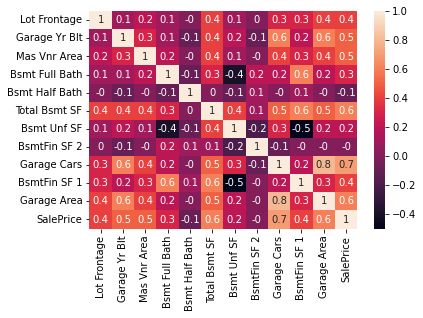

In [169]:
## Correlation Between Missing Value.
corr_df = pd.concat([iowa[null_df[null_df['Null'] > 0].transpose().columns],iowa['SalePrice']],axis=1)
sns.heatmap(round(corr_df.dropna().corr(),1),annot=True);

In [170]:
## Correlation Between features.
iowa.dropna().corr()['Garage Yr Blt'].sort_values(ascending=False)[:3]

Garage Yr Blt     1.000000
Year Built        0.841863
Year Remod/Add    0.659292
Name: Garage Yr Blt, dtype: float64

In [171]:
### The Lot Frontage has small values in correlation between SalePrice 
### so I decided to drop this columns due to high volume of missing values.

iowa = iowa.drop('Lot Frontage',axis=1)

## There are the correlated feature of Garage Yr Built so I decided to drop out Garage Yr Built by using Year Built insteads.
iowa = iowa.drop('Garage Yr Blt',axis=1)
iowa.shape

(2197, 80)

In [172]:
### Drop the rest of column because thier missing value is less than 5 %.
iowa = iowa.dropna()
print(f"{(iowa_post_drop - iowa.shape[0])*100/(iowa_post_drop)} % of Total Drop.")
print(f"Current Shape of IOWA : {iowa.shape}")

1.137915339098771 % of Total Drop.
Current Shape of IOWA : (2172, 80)


In [174]:
### Confirm Missing Values
iowa.isnull().sum().sort_values(ascending=False)

Order           0
PID             0
Garage Type     0
Fireplace Qu    0
Fireplaces      0
               ..
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
SalePrice       0
Length: 80, dtype: int64

### Data Type Checking

In [182]:
pd.DataFrame(iowa.dtypes).transpose()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,int64,int64,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,object,int64,object,int64,object,object,object,float64,float64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


#### REF

Powerful Feature Selection with Recursive Feature Elimination (RFE) of Sklearn

url = 'https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e'